**Overview**

I am working on a classification problem from kaggle which is Customer churn Prediction.

**Business Problem**

 It is said that for a company to grow its business two things play a great role, first is acquiring new customers and other is to retain old customers. So, The ability to predict that a particular customer is at a high risk of leaving, while there is still time to do something about it, will really boost the revenue source of the company.


 **why to pose this as a Machine Learning Problem ?**

By looking at the data and doing simple eda, it is not possible to set a structure of if-else rules to predict the churning of customers.So we have to use some ml algorithms to find pattern in data and predict whether a customer will churn or not.





**ML formulation of business problem**

 Now after understanding the what and why we need to solve, we can convert the business problem to a Machine Learning Problem. Here we are predicting whether a customer will churn(leave) the company or not given various behaviours of the customer about which we will discuss when we do detailed dataset analysis. So here our target is to predict whether a customer will churn or not. So we have a Binary Class classification Problem(Will churn/ Will not churn).

**performance metric**

As this is a binary classification, we can use multiple metrics. Below I have tried to explain which metrics will define what in case of customer churn prediction.

**Confusion Matrix**

A confusion matrix is a table that is  used to describe the performance of a classification model test data for which we know truth values.

**true positives (TP)**: These are cases  which are predicted positve and are actual positives.

**true negatives (TN)**: These are cases which are predicted to negative and are actually negative.

**false positives (FP)**: These are cases which are predicted to be positive but are actually negative.


**false negatives (FN)**: These are cases which are predicted to be negative but are actually positives.

 In our case:

   Let positive case be customers are not churned( that is 0).

   Let negative case be customers got churned( that is 1).

   In our case we want tp to be high, as tp high means the cases where models predict that it would not not churn will actually did not churn. So, this is what we want.

   We also want FN to be small, because if the model predict the customer as churned and actually it does not churn, then company would waste money in providing benefits to the particular customer.


**Precision**: What % of Customers Predicted to Churn Actually Churned?

    --- Number of true positives (TP) over the number of true positives plus the number of false positives (FP).
   
    precision = (TP/(TP+FP))

**Recall**: What % of the Customers Who Will Actually Churn Is the Model Able to Tag as ‘Will Churn?’

    ---    number of true positives (TP) over the number of true positives plus the number of false negatives (FN).

    recall = (TP/(TP+FN))
   

As we know there is always a tug of war between precision and recall. Generally increasing one tends to reduce others. So this should be problem specific which out of them we want to increase. 
In this case precision will tell us What % of Customers Predicted to Churn Actually Churned?, so if the model predicted a person to churn who actually will not churn then it will not make much effect. But Recall tells us  What % of the Customers Who Will Actually Churn Is the Model Able to Tag as ‘Will Churn?’, if a model will tag a customer as will not churn but actually customer churns then it would  have a bad impact. 


**F1 Score**

The F1 score  is the  weighted average of the precision and recall, where ther F1 score reaches its best value at 1 and worst score at 0.

**F1 = 2 * (precision * recall) / (precision + recall)**

**Average used in precision, recall and F1 Score**

Precision, recall and F1-Score all of them scores for all the classes and get effected by class imbalanced. To solve this we can use how we want to avearge them. Below are the options on how to average and which one to use when.

**'binary'**: It gives score only for the class specified by pso_label.

**'micro'**: It calculates metrics globally by counting total, tp,fp and fn.

**'macro'**:  It calculates metrics for each label and return their unweighted means. 

**'weighted'**: It calculates metrics for each label and return their averge weighted means by the number of true instances for each label.

**As our dataset is imbalanced , we should use average as 'weighted' which would calculate metrics for each label 0,1 and find their average weighted by the number of true instances of each label**

**Importing Required Libraries**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Churn Modeling.csv')  # reading data using pandas 

In [ ]:
data.shape # shape of data. Here we have 10k rows and 12 columns

(10000, 14)

In [ ]:
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.dtypes  # Data types of all columns as we have to convert the objects either into float64 or int64

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Understanding Columns and Transformations if neccessary**

---


***Customerid*** - As we are predicting if the customer will exit or not i dont think this id will have any role. We can just drop  it.

***Surname***- It will also not have any effect untill the company is racist(just a joke). so we can drop it also.

***CreditScore*** -  A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual(wikipedia). So we can also think that if the credit score of a person is high, he/she might not leave it. So it can play some role. we will see univariate analysis in some time.

***Geography*** - It can actually play good role. We can think  like this, suppose in one area the company is providing good service, so less people is leaving and in some loaction the service is ver bad, so more people are leaving. As the data type is object, we will label encode it.

***Gender***- Male/Female. We cant say anything on gender, it may or may not have any effect while predicting but we will keep it. As it is also string we will convert it to 0 and 1.

***Age***- It can be good candidate. As we have different age groups with different savings(i donot have any)/ money. so we can think it like same age groups are earning and they can afford services and hence will not leave.

***Tenure***- Number of yrs/months a person is loyal with the company. If a person is from very long we can say that they are satisfied and may not leave.

***Balance***- I think this is the amount they are or they have to spend on the services. it can be useful for predicting.


***NumOfProducts***- Number of products/services the customer is using from the company.

***HasCrCard***- If the customer has a credit card or not.

***IsActiveMember***- If the customer is active or not(generally use the services or not)

***EstimatedSalary***- Salary of the customer

***Exited***- If the customer leaves or not.



In [ ]:
## removing columns that doesnt seem to be useful for predicting churn, surname,customerid,rownumber

# df.drop('column_name', axis=1{remove the column}, inplace=True(updates the current df))
data.drop('Surname', axis=1,inplace=True) 
data.drop('CustomerId', axis=1,inplace=True)
data.drop('RowNumber', axis=1, inplace=True)

In [ ]:
data.head(10)   # data after removing unwanted columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Transformations (Converting Object to int )**

We can see out of all the columns we have 2 columns Geography and Age which are categorical. so first we will find out the unique values of them and then convert them into numbers.

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Here, Gender has only two columns , so we can easily convert into binary value of 0 and 1 where 0 means male and 1 means female.

In [ ]:
# This will replace the occurrence oof female with 1 and male with 0 in the dataframe and will modify the current dataframe only as inplace is set to True
data['Gender'].replace({'Female':1, 'Male':0}, inplace=True) 

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

For  the column Geography, we have three unique values France, Germany and Spain , so we can also simply replace them using label encoding of 0,1 and 2 where 0 is for France, 1 For Germany and 2 For Spain. Instead of using label encoding we can also use onehot encoding but as the number of unique values are only three, we can use both.

In [ ]:
# This will replace the occurrence oof France with 0, Germany with 1 and Spain with  in the dataframe and will modify the current dataframe only as inplace is set to True
data['Geography'].replace({'France':0, 'Germany':1, 'Spain':2}, inplace=True)

Showing data after doing some transformations

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
5,645,2,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,376,1,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0


**Adding One Feature**

By looking at the columns, i came up with a new feature that is (Balance-EstimatedSalary) which can be thought of if my salary is less then the balance i may want to leave. Later we can see how good/bad this feature can be.

In [ ]:
# data['Balance_Minus_EstimatedSalary'] = data['Balance']-data['EstimatedSalary']
# #isoverspending-0 and 1
data['isOverSpending'] = data['Balance']>data['EstimatedSalary']

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isOverSpending
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,False
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0,False
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,True
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,False
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0,True
5,645,2,0,44,8,113755.78,2,1,0,149756.71,1,False
6,822,0,0,50,7,0.00,2,1,1,10062.80,0,False
7,376,1,1,29,4,115046.74,4,1,0,119346.88,1,False
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0,True
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0,True


In [ ]:
x = dict(data['isOverSpending'].value_counts())
print(x)

{False: 6206, True: 3794}


In [ ]:
data['isOverSpending'].replace({False:0,True:1}, inplace=True)

In [ ]:
def calculate_percentage(data,target_col,current_col):
  value_cnts = dict(data[current_col].value_counts())
  for key, value in value_cnts.items():
    exited_cnt = data[(data[current_col]==key) & (data[target_col]==1)].shape[0]
    percent = (exited_cnt/value)*100
    print(f" {current_col} for value {key} percent of people exited {percent}")




**Answering Some Statistical Questions based on Age Groups**

1) Which age group of people have highest churn percentage?

2) Out of the age Group which have highest churn prediction how many of them are male or female?

3) Out of the age Group which have highest churn prediction, what is the percentage per country.


In [ ]:
calculate_percentage(data, 'Exited', 'AgeGroup')

 AgeGroup for value 30-39 percent of people exited 10.883571099861943
 AgeGroup for value 40-49 percent of people exited 30.786860198624904
 AgeGroup for value 20-29 percent of people exited 7.600502512562814
 AgeGroup for value 50-59 percent of people exited 56.04142692750288
 AgeGroup for value 60-69 percent of people exited 35.199999999999996
 AgeGroup for value 70-79 percent of people exited 10.294117647058822
 AgeGroup for value 10-19 percent of people exited 6.122448979591836
 AgeGroup for value 80-89 percent of people exited 7.6923076923076925
 AgeGroup for value 90-99 percent of people exited 0.0
 AgeGroup for value 0-9 percent of people exited nan


**ANSWER 1--** We can see that maximum churned are in the age group of [50-59] with churn percentage of 56% then followed by [60-69] with 35 % churn rate.

Now we will answer our 2nd question i.e. **Out of the age Group which have highest churn prediction how many of them are male or female?**

In [ ]:
total_customers_in_age_group_50_59 = data[(data['AgeGroup']=='50-59') & (data['Exited']==1)].shape[0]
male_in_age_group_50_59 =  data[(data['AgeGroup']=='50-59') & (data['Exited']==1) & (data['Gender']==0)].shape[0]
male_percentage = (male_in_age_group_50_59/total_customers_in_age_group_50_59)*100
female_percentage = 100-male_percentage
print(male_percentage)
print(female_percentage)

487
45.58521560574948
54.41478439425052


**ANSWER 2--**We see that for the age group [50-59] which have maximun churn prediction we have 45% of male and 55% of female from this. We can say that more females are leaving the company of this age group.

Now we will ty to answer our third question i.e . **Out of the age Group which have highest churn prediction, what is the percentage per country**

In [ ]:
total_customers_in_age_group_50_59 = data[(data['AgeGroup']=='50-59') & (data['Exited']==1)].shape[0]
value_cnts = dict(data['Geography'].value_counts())
for key, value in value_cnts.items():
  val =  data[(data['AgeGroup']=='50-59') & (data['Exited']==1) & (data['Geography']==key)].shape[0]
  percent = (val/total_customers_in_age_group_50_59)*100
  country=''
  if key ==0:
    country='France'
  elif key == 1:
    country = 'Germany'
  else:
    country = 'Spain'
  print(f"In {country} {percent} of people are leaving from age group 50-59")


In France 40.4517453798768 of people are leaving from age group 50-59
In Germany 39.83572895277207 of people are leaving from age group 50-59
In Spain 19.71252566735113 of people are leaving from age group 50-59


**ANSWER 3**-- For the age group [50-59] which have maximum churn prediction, most of them are from France with 40% and then from germany with 39% then lastly from spain with 19%

**Answering Some Statistical Questions based on Geography**


---


1) what are the percentage churn in each geogrophical location?

2) Out of the percentage churn in each location how many of them are male and female.

In [ ]:
# percentage churn in each geogrophical location
calculate_percentage(data,'Exited','Geography')

 Geography for value 0 percent of people exited 16.15476665337056
 Geography for value 1 percent of people exited 32.44320446392985
 Geography for value 2 percent of people exited 16.673395236172787


**ANSWER 4**-- We can see that For Germany we have maximum churn percentage of 32% follwed by spain and france

Now we will check out of customers churned in germany how many of thwm are male and how many are female.

In [ ]:
value_cnts = dict(data['Gender'].value_counts())
for key, value in value_cnts.items():
  total = data[(data['Geography']==1) & (data['Exited']==1)].shape[0]
  val =  data[(data['Geography']==1) & (data['Exited']==1) & (data['Gender']==key)].shape[0]
  percent = (val/total)*100
  gender=""
  if key==0:
    gender="Male"
  else:
    gender="Female"
  print(f" From Germany percent of {gender} churned is {percent}")

 From Germany percent of Male churned is 44.96314496314496
 From Germany percent of Female churned is 55.03685503685504


**ANSWER 5**-- IN Germany which have maximum churned percentage , 45% of them are male and 55% of them are female.

In [ ]:
def univariate_plot(data,target_col,current_col):
  '''
     This is wrapper method for univariate plots. It takes three arguments:
        1) DataFrame
        2) The Target Column Name (Exited in this case)
        3) The Column name for which we want to plot. (All other features except the target varaible)
    
    Using the target col it divides the df into two parts for example Customer who have churned and customers not churned and plot ir counts against the 
    values of the provided current column (Like Tenure,Age etc..)

    Example Usage--> univariate_plot(data,'Exited','Tenure')

  
  '''
  target_1 = data[data[target_col]==1][current_col]
  target_0 =  data[data[target_col]==0][current_col]

  plt.xlabel(f"{current_col}")
  plt.ylabel("Number Of Customers")
  plt.title("Customer Churn Prediction Visualiztion")
  plt.hist([target_1, target_0], color =['red', 'green'], label=['Exited', 'Not Exited'])
  plt.legend()

**Univariate Analysis Of All Features**

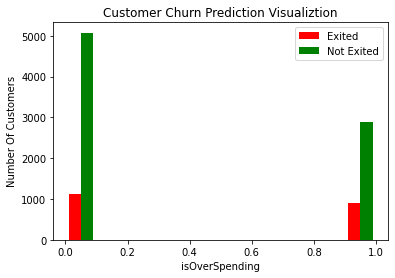

In [ ]:
#Tenure
univariate_plot(data,'Exited','isOverSpending')

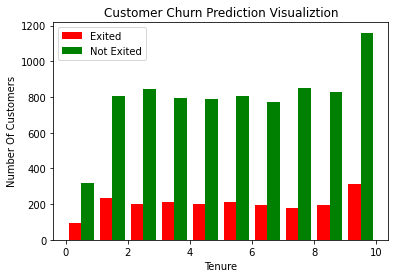

In [ ]:
#Tenure
univariate_plot(data,'Exited','Tenure')

By looking at Plot we can say that the maximum people are leaving if they have a tenure of around 10 years which is the maximum number of tenures, so the case would be that as they are so old, company is not looking after them instead they are looking to generate new customers. so Company can provide some benefits for the customers who are actually from a long time with the company to retain them.

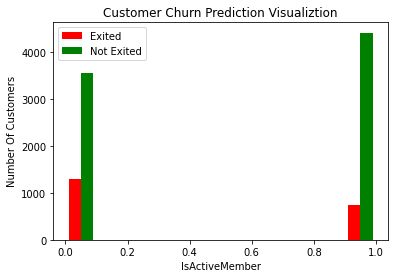

In [ ]:
#IsActiveMember
univariate_plot(data,'Exited','IsActiveMember')

This is actually very clear and predictable, the customers who are not very active are leaving more in comparison to the customers who are active. So, company can take a step to make peoples active by continously providing some beneifts so that customers ar eactively using the services and hence churn will be less.

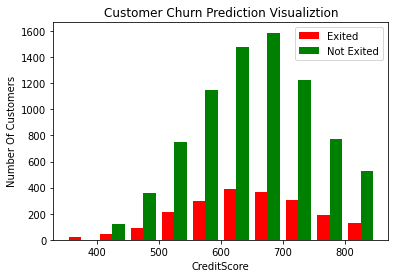

In [ ]:
#CreditScore
univariate_plot(data,'Exited','CreditScore')

Most Of the customers with a credit score in the range [600-700] are leaving. Not much can be deduced. This may not be  very useful for predicting churn 

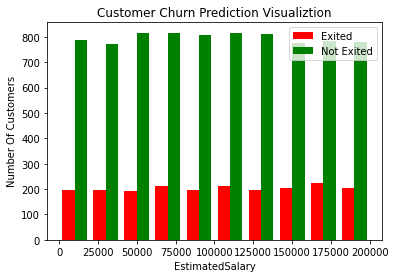

In [ ]:
univariate_plot(data,'Exited','EstimatedSalary')

From the above plot we can see that for almost all estimated salaries , number of customers churning is almost same.

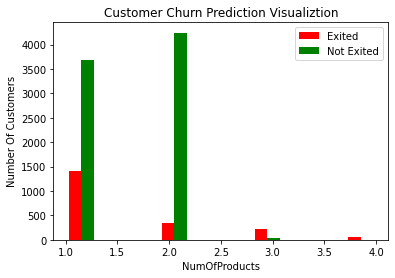

In [ ]:
univariate_plot(data,'Exited','NumOfProducts')

We can see from the above plot that the customers that are using only one product of the company then the churn ratio is  very high in compare of cusomters who are using more than 1 products. An intution can be made that company should encourage their customers for using more services or  products to reduce churn rate.

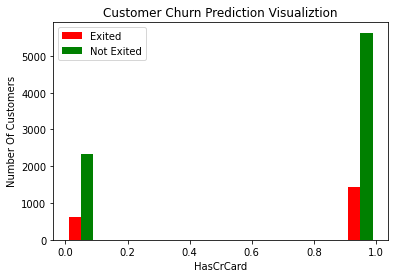

In [ ]:
univariate_plot(data,'Exited','HasCrCard')

This plot shows if a cusotmers has credit card or not vs the number of customers leaving/not leaving. We can see more number of people are leaving if they have credit card which might be possible that the interest on credit card charged by the bank is very high and not affordable due to which they are leaving.

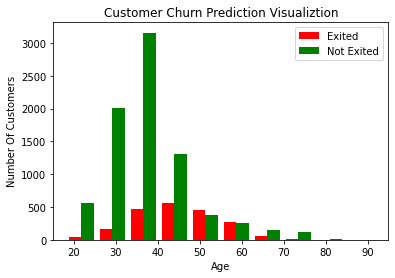

In [ ]:
univariate_plot(data,'Exited','Age')

This plot shows the age of customers vs number of customers leaving/not leaving.
By looking at the plot we can see that the customers with age in the range of [30-50] have high churn ratio. It may be possible that company is not satisfying needs particular to these age groups, so they are leaving. One solution could be that bank/company can start some services/benefits that directly benefit these age group which can help to reduce their churn ratio.

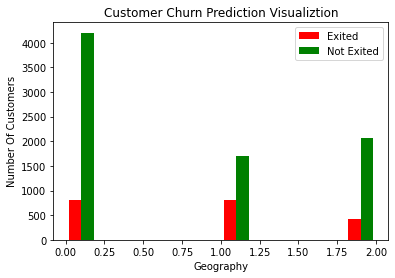

In [ ]:
univariate_plot(data,'Exited','Geography')

This plot shows the  number of customers leaving/not leaving of a particular location. By looking at the plot we can say that most number of customers are leaving from Germany(1) and ,east from spain(2). So it might be the case the company's service in germany is very bad, customer support or sort of like that, so the company can work on improving their services in germany and France to reduce churn rates in these locations.

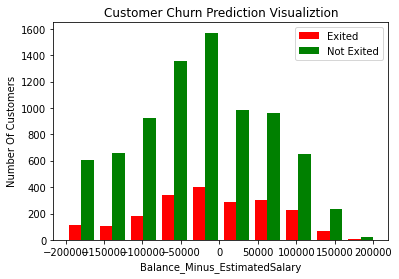

In [ ]:
univariate_plot(data,'Exited','Balance_Minus_EstimatedSalary')

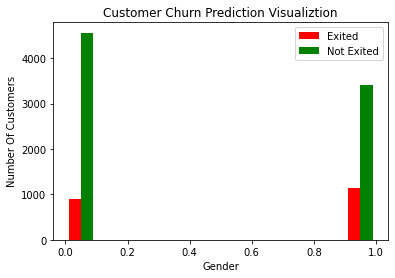

In [ ]:
univariate_plot(data,'Exited','Gender')

This is plot between if a customer is male/female vs number of customers leaving/not leaving. We can see that 1(Female) customer's churn rates are more than 0(males).

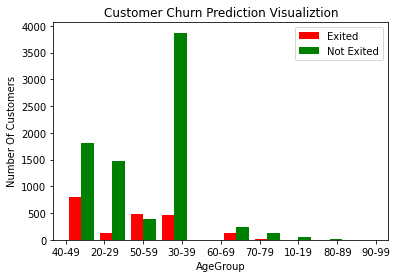

In [ ]:
univariate_plot(data,'Exited','AgeGroup')

**Bivariate Analysis**

In [ ]:
max_age = max(data['Age'])
min_age = min(data['Age'])
print(max_age)
print(min_age)
# dividing people into age_groups [10,20] [21,30] , [31,40]


92
18


In [ ]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isOverSpending,AgeGroup
0,619,0,1,42,2,0.00,1,1,1,101348.88,1,False,40-49
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0,False,40-49
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1,True,40-49
3,699,0,1,39,1,0.00,2,0,0,93826.63,0,False,30-39
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0,True,40-49


In [ ]:
columns = list(data.columns.values)
print(columns)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Balance_Minus_EstimatedSalary']


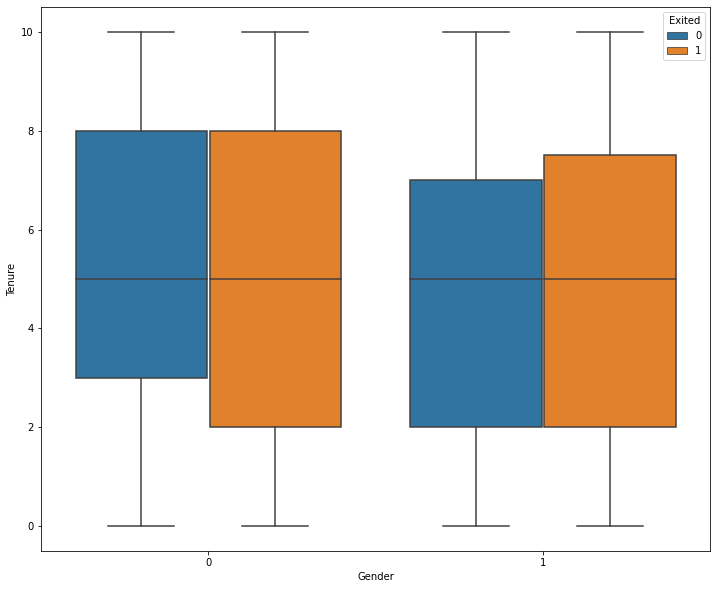

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Gender',y='Tenure',hue='Exited',data=data)

BoxPlot of Gender vs Tenure which shows how Gender and Tenure Together effect if the customer will churn or not.

By looking at the plot , a simple condition can be found i.e .

if gender is male the most of the customer churned have a tenure between [2,8] and customer not churned have tenure of [3,8]

if gender is female , then most of customer churned have a tenure between [2,7] and customer not churned have a tenure between [2,6.5]


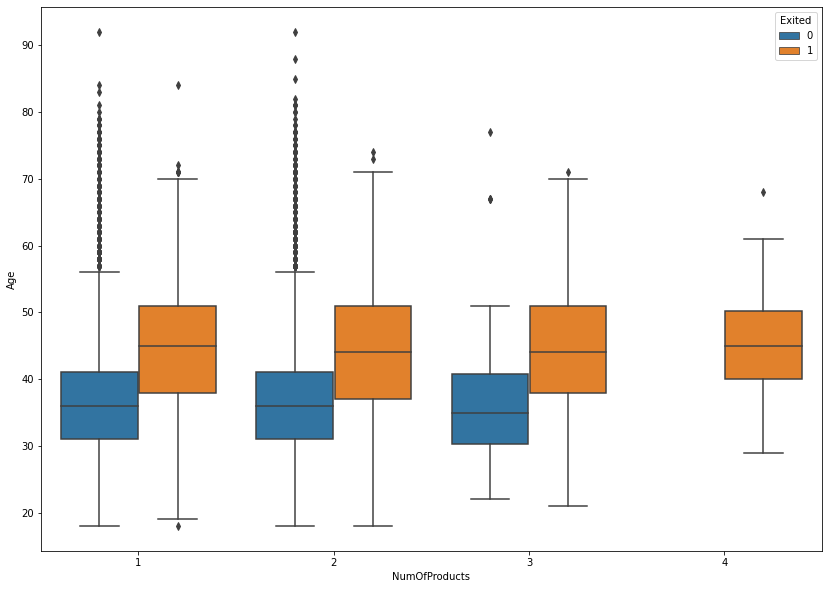

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='NumOfProducts',y='Age',hue='Exited',data=data)
# if np=1 and age>40-- most people are leaving and if np=2 and age > 40--most if np=4 . not matter age only leaving

The above plot shows NumOfProducts vs Age. 

By looking at the plot, we can write simple statements:-

if numofproducts used is 1, then most of the customer that have churned have age approximately between [38,50] and customers didnot churn have age approx between [30,40]

if numofproducts used is 2, then most of the customer that have churned have age approximately between [38,50] and customers didnot churn have age approx between [30,40]

if numofproducts used is 3, then most of the customer that have churned have age approximately between [38,50] and customers didnot churn have age approx between [30,40]

if numofpoducts used is 4, then all of the customers have churned.


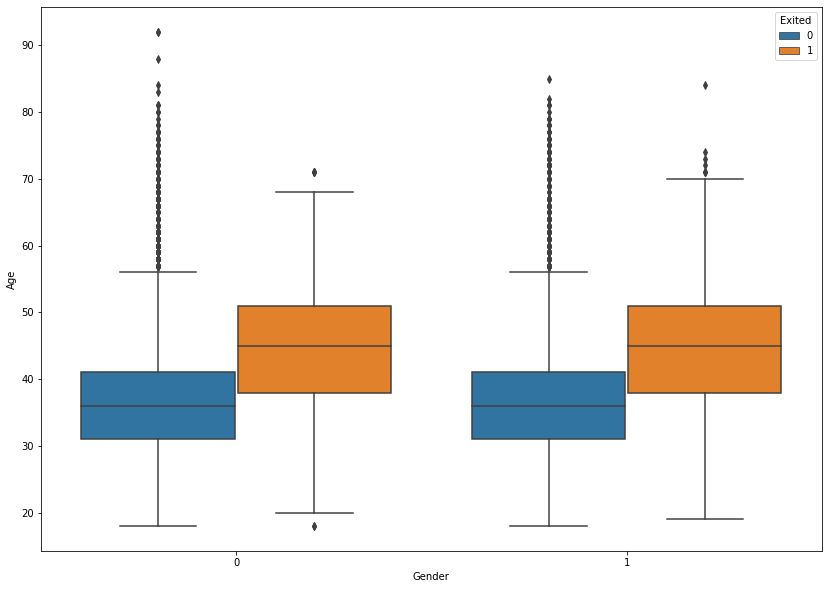

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Gender',y='Age',hue='Exited',data=data)

The above plot shows Gender vs Age. 

By looking at the plot, we can write simple statements:-

if Customer is male (that is gender is 0), then most of the customer that have churned have age approximately between [38,50] and customers didnot churn have age approx between [30,40]

if customer is female (that is gender is 1), then most of the customer that have churned have age approximately between [38,50] and customers didnot churn have age approx between [30,40]

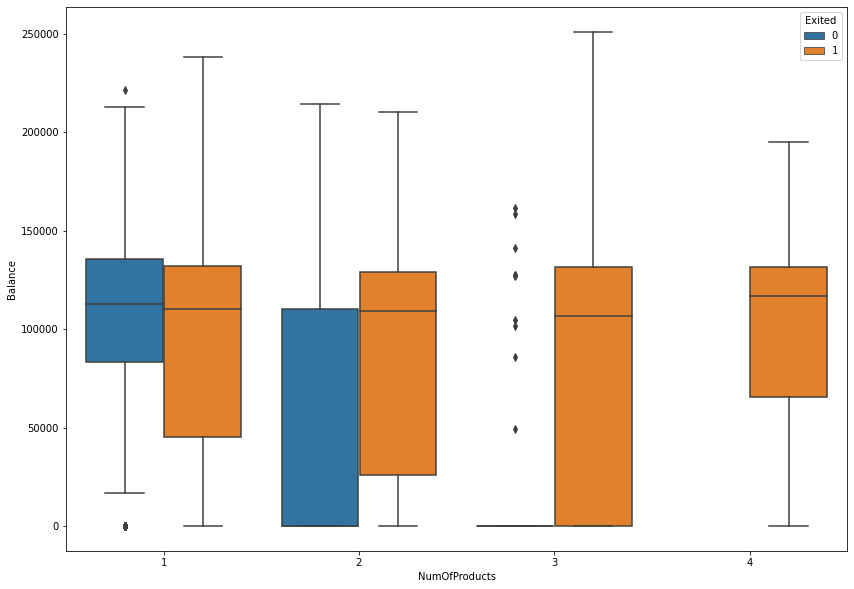

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='NumOfProducts',y='Balance',hue='Exited',data=data)

The above plot shows NumOfProducts vs Balance. 

By looking at the plot, we can write simple statements:-

if numofproducts used is 1, then most of the customer that have churned have Balance approximately between [5000,125000] and customers didnot churn have balance approx between [80000,125000]

if numofproducts used is 2, then most of the customer that have churned have balance approximately between [25000,120000] and customers didnot churn have balance approx between [0,120000]

if numofproducts used is 3, then most of the customer that have churned have balance approximately between [0,120000] and customers didnot churn are very less

if numofpoducts used is 4, then all of the customers have churned.

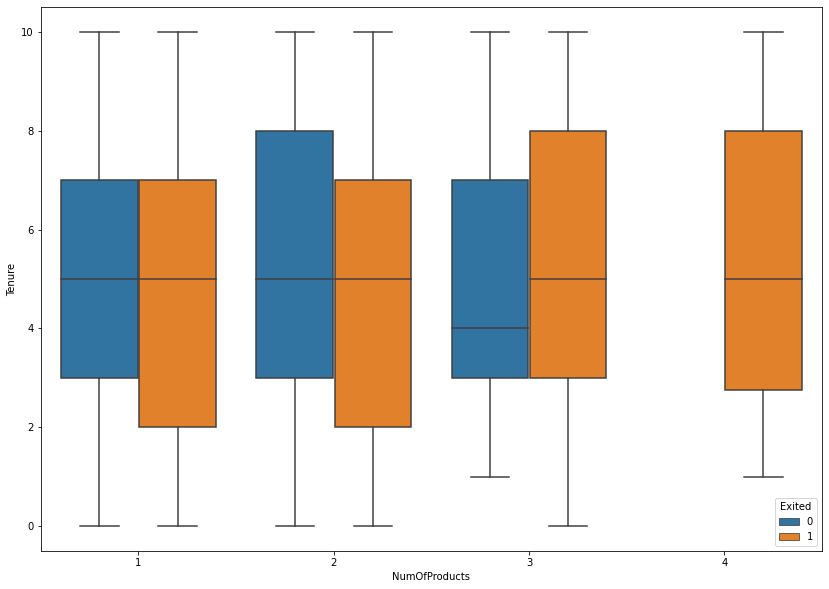

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='NumOfProducts',y='Tenure',hue='Exited',data=data)

The above plot shows NumOfProducts vs Tenure. 

By looking at the plot, we can write simple statements:-

if numofproducts used is 1, then most of the customer that have churned have Tenure approximately between [2,7] and customers didnot churn have Tenure approx between [3,7]

if numofproducts used is 2, then most of the customer that have churned have Tenure approximately between [2,7] and customers didnot churn have Tenure approx between [3,8]

if numofproducts used is 3, then most of the customer that have churned have Tenure approximately between [3,7] and customers didnot churn have tenure approx between [3,8]

if numofpoducts used is 4, then all of the customers have churned.

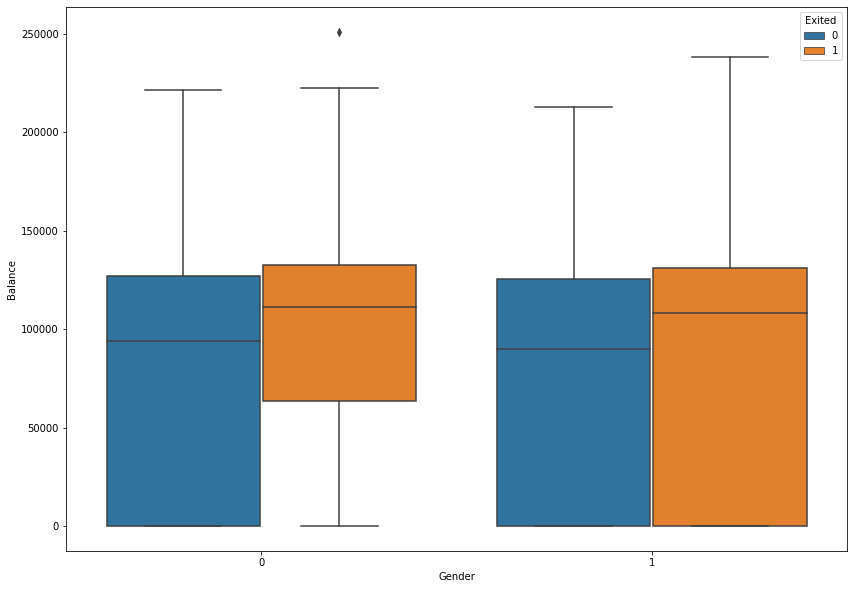

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Gender',y='Balance',hue='Exited',data=data)

The above plot shows Gender vs Balance.

By looking at the plot, we can write simple statements:-

if gender is 0, that is customer is male, then most of the customers that churned have an balance approx between [80000,120000] and customers didnot churn have a balance approx between [0,110000]

if gender is 1, that is customer is female, then most of the customers that churned have balance between [0,120000] and didnot churn have balance between [0,110000]


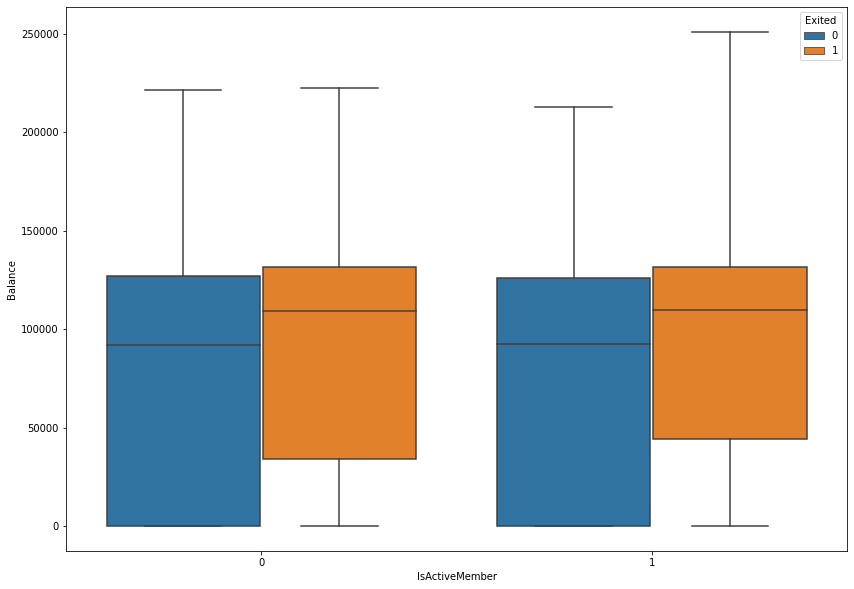

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='IsActiveMember',y='Balance',hue='Exited',data=data)

The above plot is for IsActiveMember vs Balance.

Simple statements that can be made by looking at the plot:-

if a customer is not an activemember, then customers that have churned have balance approx between [40000,120000] and customers that didnot churned have balance between [0,120000]

if a customer is  an activemember, then customers that have churned have balance approx between [50000,120000] and customers that didnot churned have balance between [0,120000]


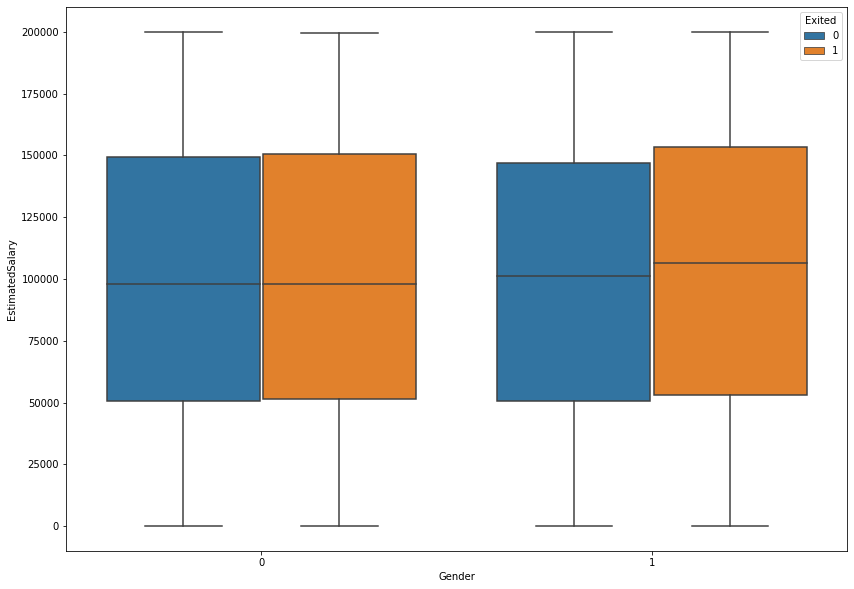

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Gender',y='EstimatedSalary',hue='Exited',data=data)

The above plot is Gender vs NumofProducts.
By looking at the plots we cannot say much as for both churned and not churned there is not much difference.

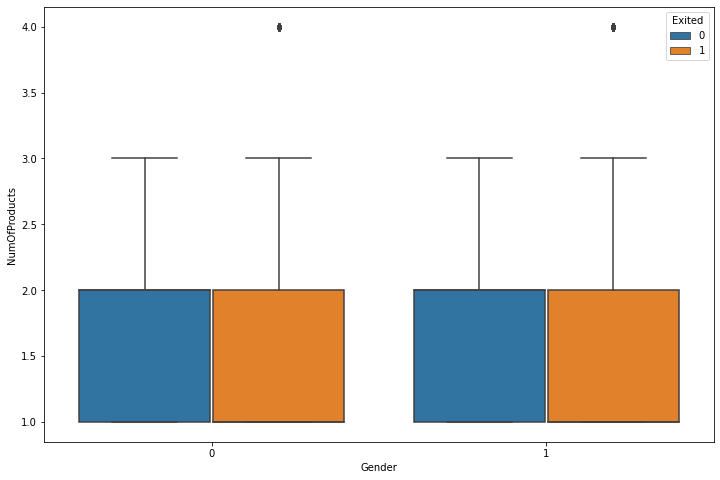

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='NumOfProducts',hue='Exited',data=data)

The above plot is Gender vs NumofProducts.
By looking at the plots we cannot say much as for both churned and not churned there is not much difference.

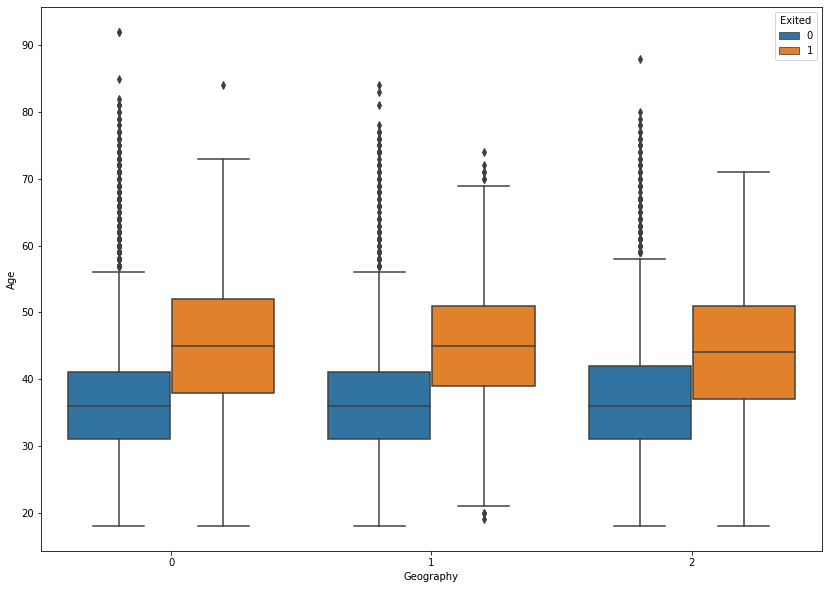

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Geography',y='Age',hue='Exited',data=data)

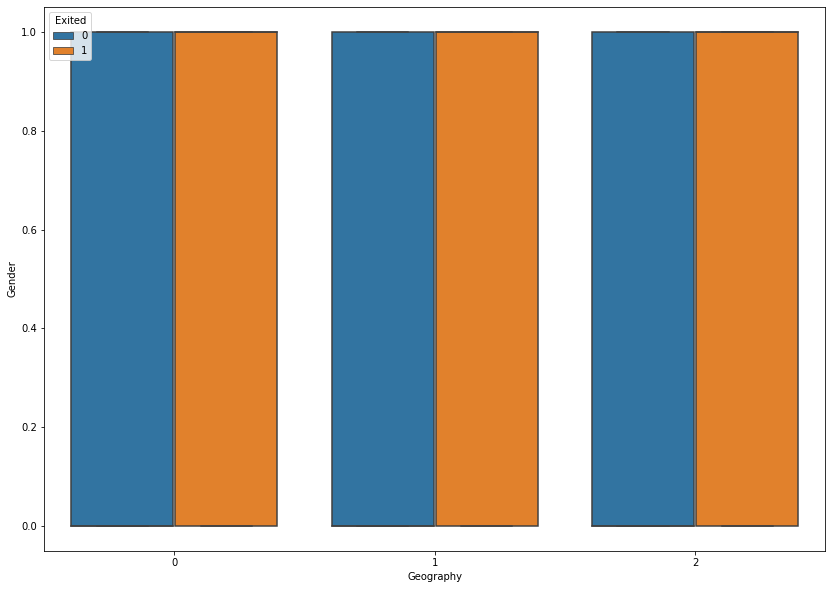

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Geography',y='Gender',hue='Exited',data=data)

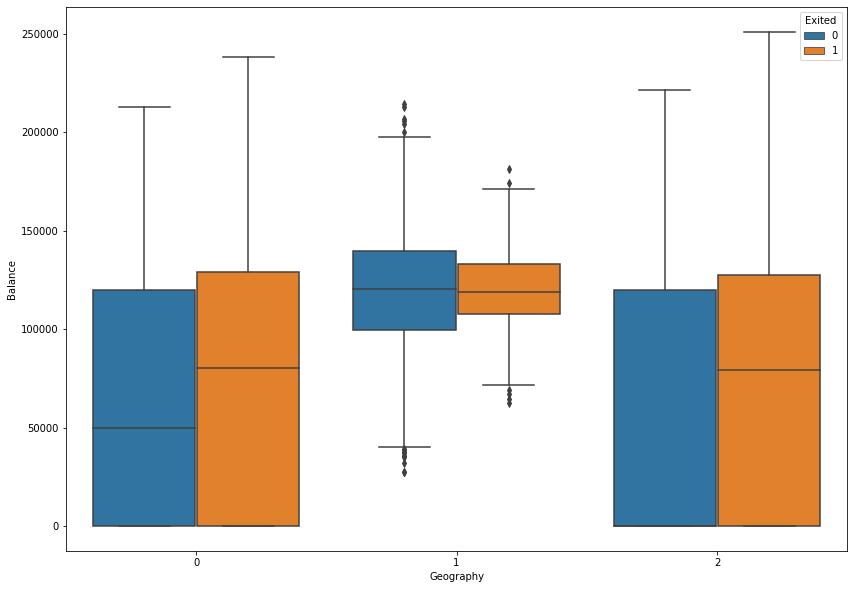

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Geography',y='Balance',hue='Exited',data=data)

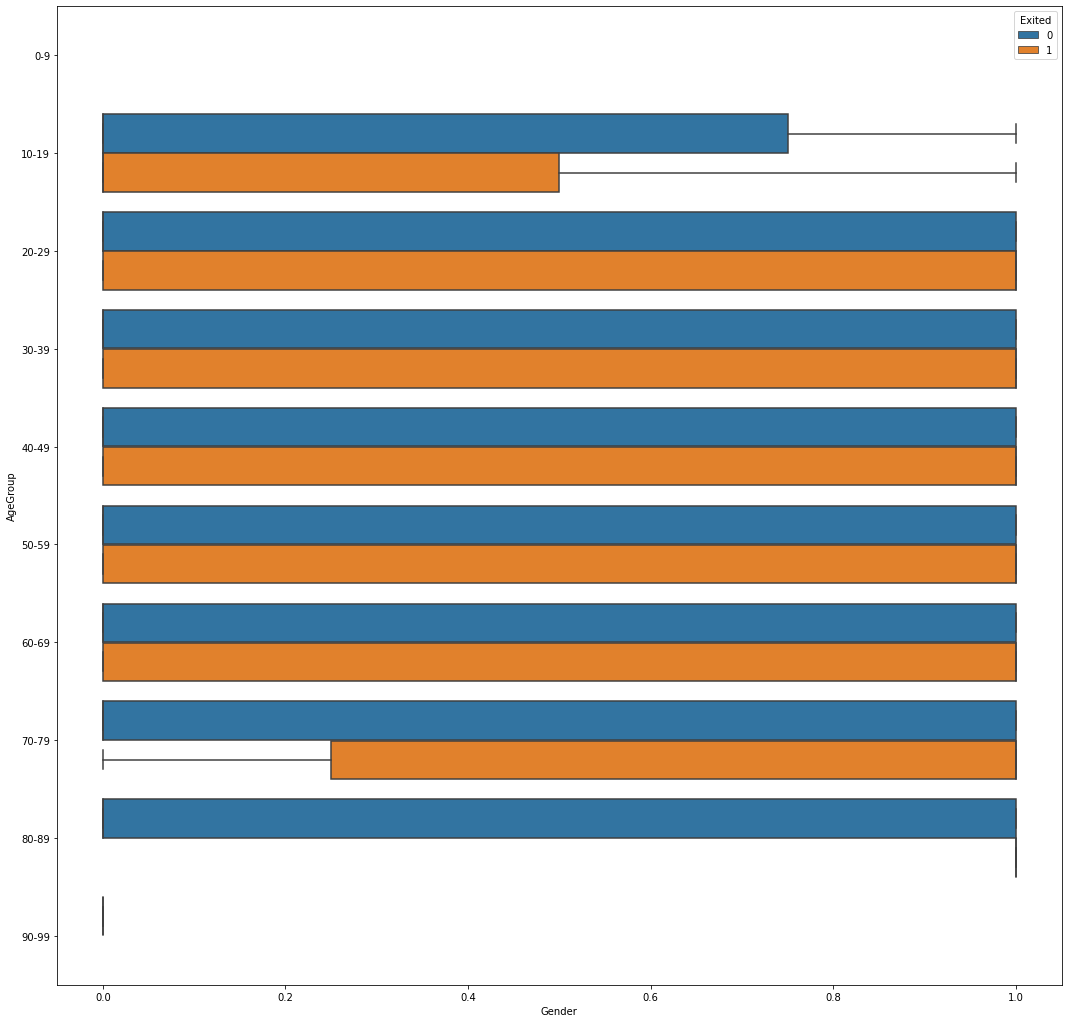

In [ ]:
plt.figure(figsize=(18,18))
sns.boxplot(x='Gender',y='AgeGroup',hue='Exited',data=data)

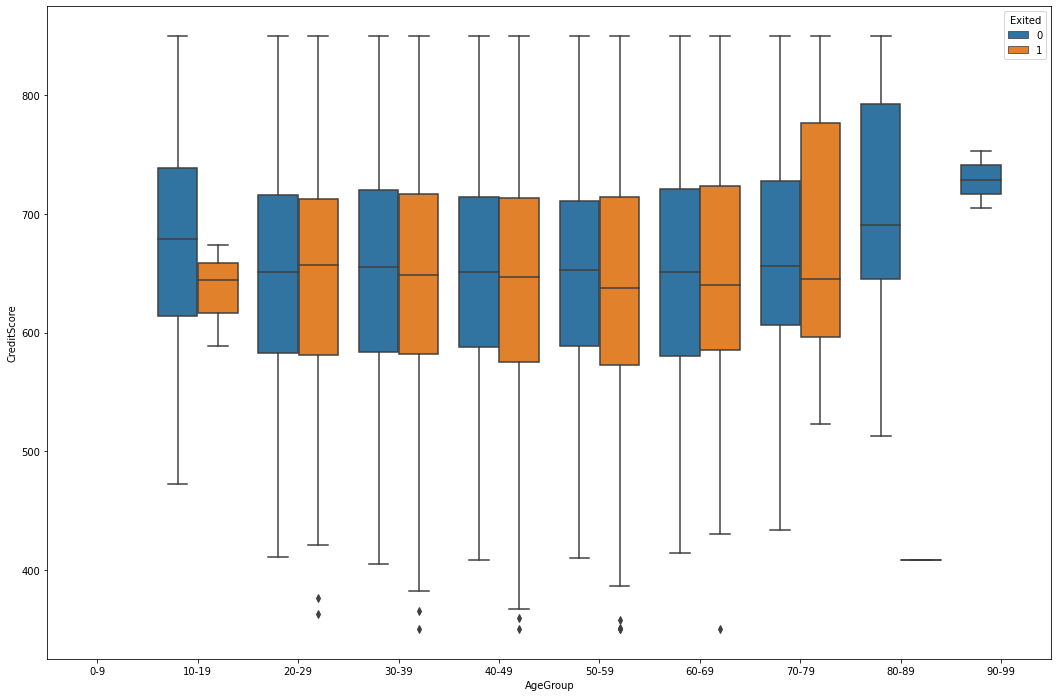

In [ ]:
plt.figure(figsize=(18,12))
sns.boxplot(x='AgeGroup',y='CreditScore',hue='Exited',data=data)

**Correlation**

In [ ]:
# relation between the features using datframe corr method using pearson correlation technique.
corr_mat = data.corr(method='pearson')

We have already converted categorical variable to numerical so now we can use data.corr()

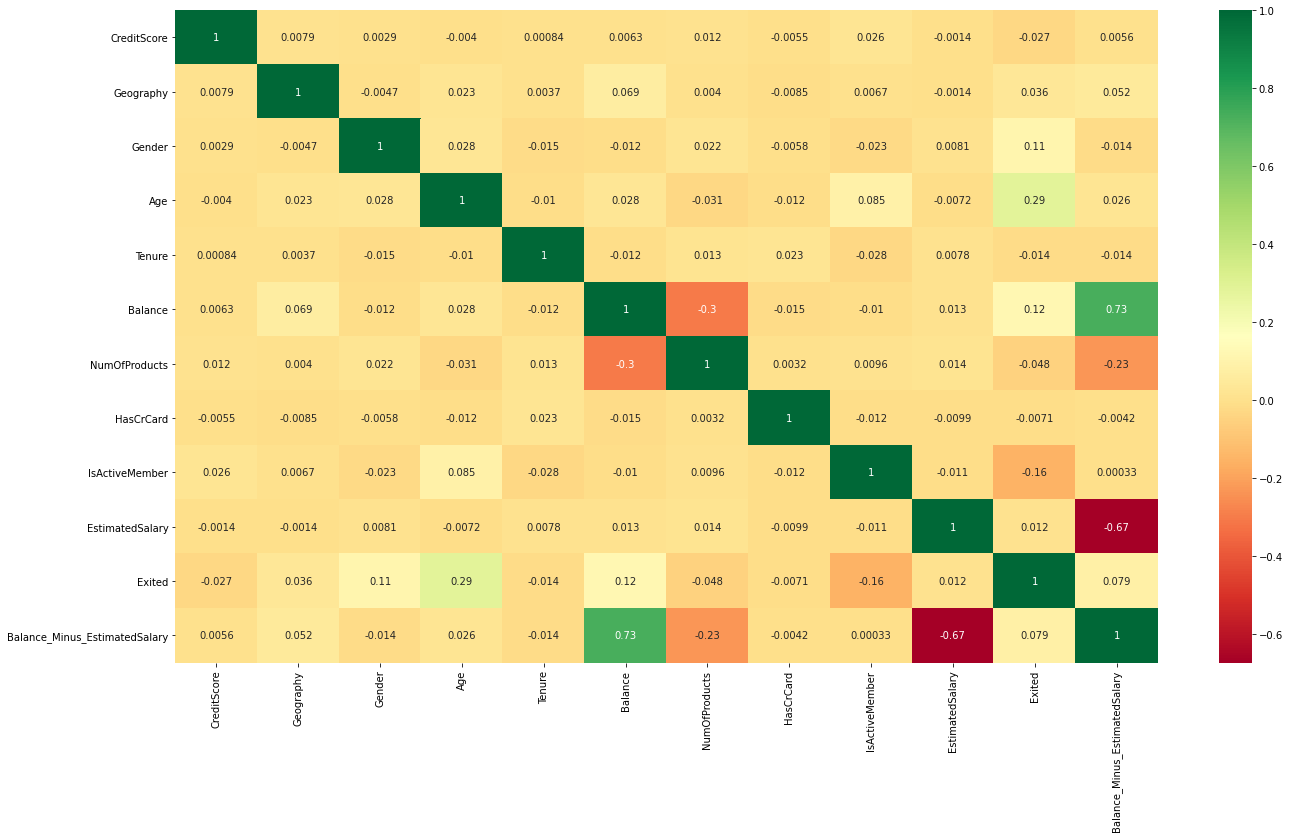

In [ ]:
# this code show the correlation matrix using a heatmap
plt.figure(figsize =(22,12))
sns.heatmap(data.corr(method='pearson'), annot= True, cmap ='RdYlGn')

By looking at the above heatmap which shows the correlation between the features,we can see that the values are very less, it can be deduce that there is not so strong correlation between the features.But we can actually set a threshold (0.10) and if the corr value between two features is more than that we can say that they are somewhat correlated.

In [ ]:
def get_correlated_features(corr_mat,threshold):

  '''
     This method is to get the realted features using the correlation matrix and some threshold above which
     we can say that two features are said to be related.
     Arguments: 
        1) correlation matrix (dataframe.corr())
        2) threshold (dtype: float64)
     Returns a dictionary where key is features and value is the list of features to whom it can be said as related.

  
  '''
  related_features = dict()
  for i in list(corr_mat.columns):
    if not related_features.__contains__(i):
      related_features[i] = []
    for j in list(corr_mat.columns):
      if corr_mat[i][j] >threshold and corr_mat[i][j] !=1:
        curr_list = related_features.get(i).append(j)
  return related_features

In [ ]:
related_features = get_correlated_features(corr_mat,0.10)
print(related_features)            

{'CreditScore': [], 'Geography': [], 'Gender': ['Exited'], 'Age': ['Exited'], 'Tenure': [], 'Balance': ['Exited', 'Balance_Minus_EstimatedSalary'], 'NumOfProducts': [], 'HasCrCard': [], 'IsActiveMember': [], 'EstimatedSalary': [], 'Exited': ['Gender', 'Age', 'Balance'], 'Balance_Minus_EstimatedSalary': ['Balance']}


Here according to our threshold we can find some of the related features  like  {[Gender, Exited] or [Age, Exited] or[Balance,'Exited','Balance_Minus_EstimatedSalary']}

In [ ]:
corr_mat.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Minus_EstimatedSalary
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005583
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,0.052299
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,-0.014478
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.025861
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014378
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.731321
NumOfProducts,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.234797
HasCrCard,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.004220
IsActiveMember,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.000328
EstimatedSalary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.672619


**We can also Draw some box plots and see if their are outliers or not**

# boxplots

In [ ]:
def boxplots(data,column_name):
  '''
     This is a wrapper method to draw a bos plot.
     It takes two argument dataframe and the column of which we want to draw boxplot.
  '''
  plt.figure(figsize = (10, 6))
  ax = sns.boxplot(data[column_name])
  plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
  plt.xticks(rotation=45)


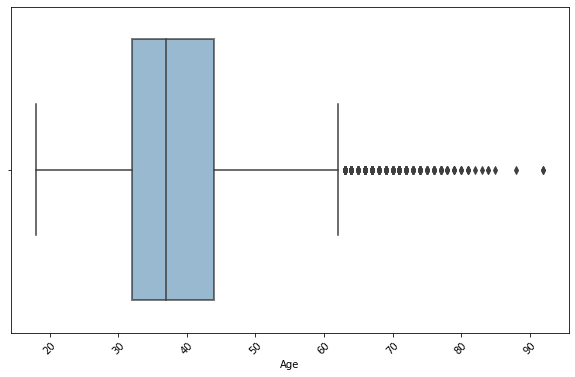

In [ ]:
#Age
boxplots(data,'Age')

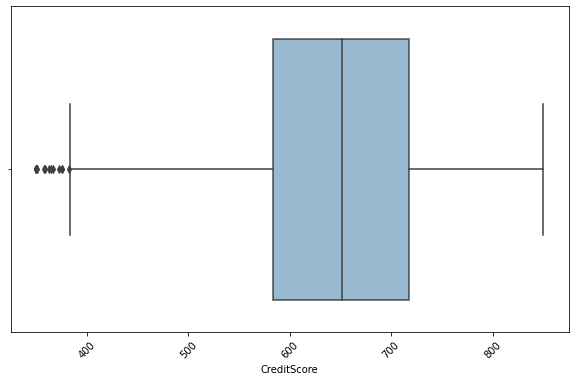

In [ ]:
#CreditScore
boxplots(data,'CreditScore')

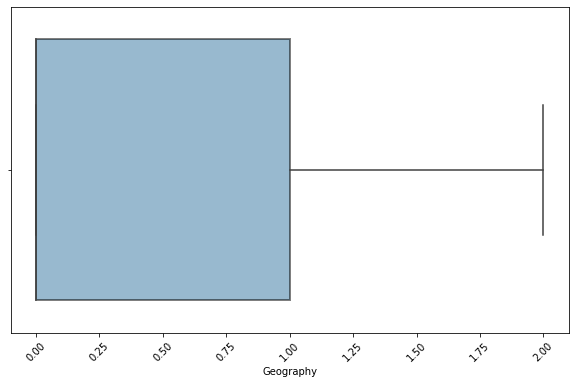

In [ ]:
#Geography
boxplots(data,'Geography')

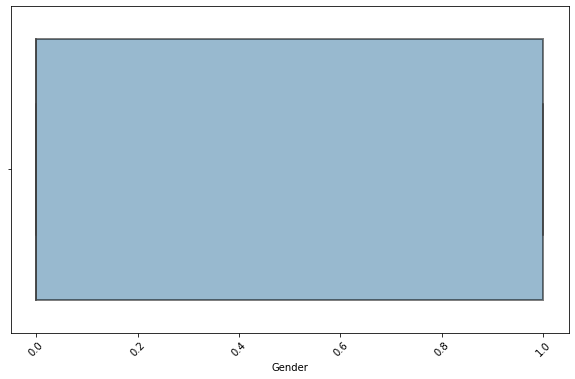

In [ ]:
#Gender
boxplots(data,'Gender')

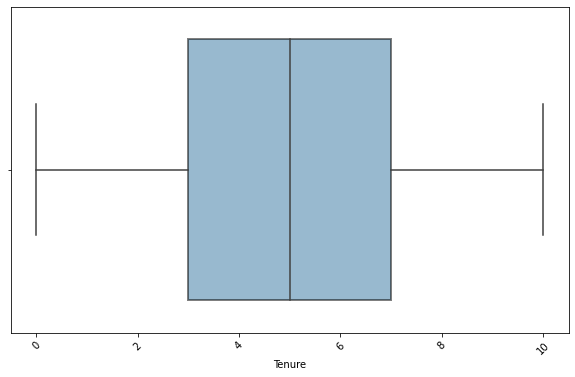

In [ ]:
#Tenure
boxplots(data,'Tenure')

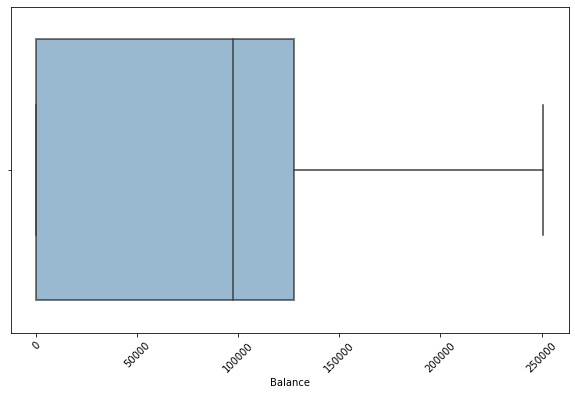

In [ ]:
#Balance
boxplots(data,'Balance')

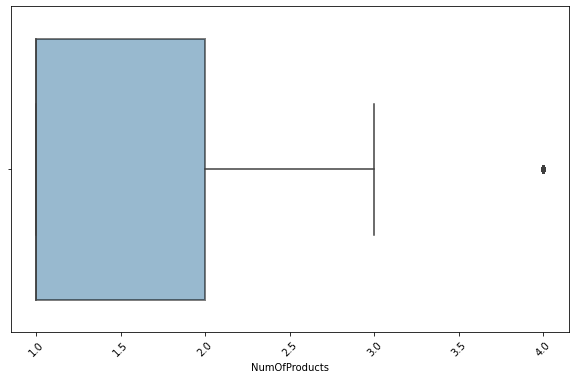

In [ ]:
#NumOfProducts
boxplots(data,'NumOfProducts')

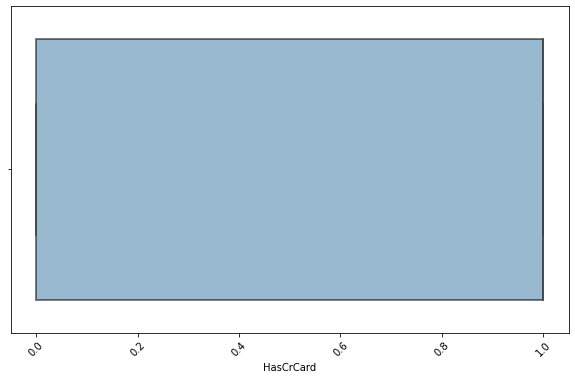

In [ ]:
#HasCrCard
boxplots(data,'HasCrCard')

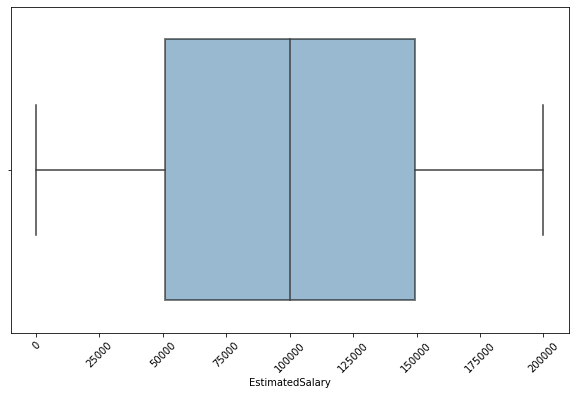

In [ ]:
#EstimatedSalary
boxplots(data,'EstimatedSalary')

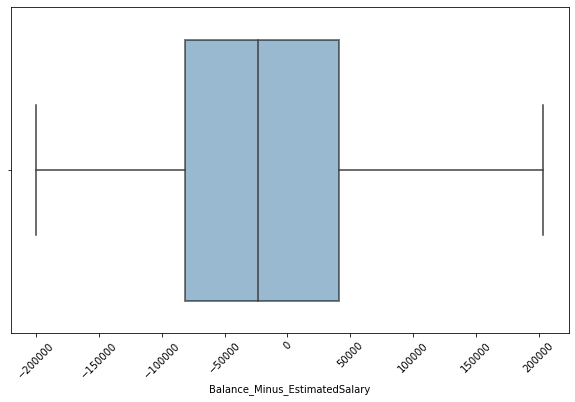

In [ ]:
#Balance_Minus_EstimatedSalary
boxplots(data,'Balance_Minus_EstimatedSalary')

__OBSERVATIONS TILL NOW__

__KEY UNDERSTANDING FROM EDA AND FE__


1) we have 14 columns namely ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']

2) Out of these 14 columns we have three columns which seems to be not important for prediction . They Are RowNumber, CustomerId, Surname. We can just drop these columns

3) We have Two categorical columns namely Geography and Gender which needs to be converted to numeric. 

    3.1) Column Gender has Two unique values namely MALE and FEMALE, so we can do label encoding on them by replacing MALE with 0 and FEMALE with 1. 

    3.2) Column Geography has Three unique values representing location where the company provides it services namely France, Germany And Spain. Here also we can do label encoding representing France with 0, Germany with 1 and Spain with 2.

4) By doing the above eda, below points are found and can be considered important:

    4.1) Most Of the customers that are leaving/churning are in the age group of [50-59] and out of these customers we have 55% female who have churned and 45% male. So more  Female customers are leaving.

    4.2) On the basis of Geography, Most of the  customers leaving/churning are from Germany and out of these most of them are females.

    4.3) Most of the customers who holds a credit card are leaving/churning.

    4.4) All the customers who have used more than 3 products/services of the company have churned.

    4.5) If we look at the box plot of age we have some outliers but as our data is  small we cannot remove them.



# Modelling

In [ ]:
def get_classifier(X_train,Y_train,classifier,best_params=None):
  clf = None
  if classifier=='logistic':
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train,Y_train)
  else:
    clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                             min_samples_split=best_params['min_samples_split'])
    clf.fit(X_train,Y_train)
  return clf

In [ ]:
# method to get all the metrics for a classifier 
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
def get_metrics(clf,X_train,X_test,Y_train,Y_test):
  y_pred_test = clf.predict(X_test)
  y_pred_test_prob = clf.predict_proba(X_test)[:,1]
  y_pred_train = clf.predict(X_train)
  y_pred_train_prob = clf.predict_proba(X_train)[:,1]
  accuracy = accuracy_score(Y_test,y_pred_test)
  precision= precision_score(Y_test, y_pred_test, average='weighted')
  recall = recall_score(Y_test,y_pred_test,average='weighted')
  f1_scores = f1_score(Y_test,y_pred_test,average='weighted')
  
  # creating metrics dict
  metrics = dict()
  metrics['accuracy'] = accuracy
  # metrics['auc_test'] = auc_test
  # metrics['auc_train'] = auc_train
  metrics['precision'] = precision
  metrics['recall'] = recall
  metrics['f1_score'] = f1_scores

  return metrics

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(Y_test,y_pred):
  cm = confusion_matrix(Y_test, y_pred)
  plt.figure(figsize = (10,7))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')


In [ ]:
def plot_feature_importances(clf,data):
  plt.barh(data.columns.values,clf.feature_importances_)

In [ ]:
def plot_roc_auc_curve(clf,X_test,X_train,Y_train,Y_test):
  y_pred_test_prob = clf.predict_proba(X_test)
  y_pred_train_prob = clf.predict_proba(X_train)
  train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, y_pred_train_prob[:,1])
  test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, y_pred_test_prob[:,1])
  plt.plot(train_fpr, train_tpr,label=f"Train auc= {auc(train_fpr, train_tpr)}")
  plt.plot(test_fpr, test_tpr,label=f"Test auc= {auc(test_fpr, test_tpr)}")
  plt.legend()
  plt.xlabel("False Positve Ratio")
  plt.ylabel("True positive Ratio")
  plt.title("Train And Test Auc")
  plt.show()


**Train Test Split**

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

y = data['Exited']
data.drop('Exited',axis=1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.1)
print(X_train.head())

      CreditScore  Geography  ...  EstimatedSalary  isOverSpending
9040          581          1  ...         32919.42               1
3537          602          0  ...        162347.05               0
6539          697          0  ...         46807.62               0
7778          583          2  ...          5985.36               0
3545          468          0  ...        198714.29               0

[5 rows x 11 columns]


**Random Forest With Hyperparamter Tuning Using Grid Search Cv**

---



***Understanding Hyperparamters in RandomForest***

---

**n_estimators** = number of trees in the foreset

**max_features** = max number of features considered for splitting a node

**max_depth** = max number of levels in each decision tree. If none it will go to max_depth

**min_samples_split** = min number of data points placed in a node before the node is split

**min_samples_leaf** = min number of data points allowed in a leaf node

**bootstrap** = method for sampling data points (with or without replacement)


In [ ]:
def randomForest_param_grid():
  n_estimators = [int(x) for x in np.linspace(start = 300, stop = 2000, num = 4)]
  max_depth = [int(x) for x in np.linspace(5, 110, num = 4)]
  max_depth.append(None)
  min_samples_split = [1,2,3,4]
  min_samples_leaf = [1,2,3,4]
  bootstrap = [False]
  param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
  return param_grid

In [ ]:
param_grid = randomForest_param_grid()
print(param_grid)

{'n_estimators': [300, 866, 1433, 2000], 'max_depth': [5, 40, 75, 110, None], 'min_samples_split': [1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=clf,param_grid=param_grid,cv=3,verbose=0,n_jobs=3)
grid_cv.fit(X_train, y_train)

In [ ]:
print(grid_cv.best_params_)

{'bootstrap': False, 'max_depth': 110, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#best_params = grid_cv.best_params_
import pickle
best_params = {'bootstrap': False, 'max_depth': 110, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
rf_clf = get_classifier(X_train,y_train,'random-forest',best_params)
filename = 'finalized_model.pkl'
pickle.dump(rf_clf, open(filename, 'wb'))
print(rf_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
metrics = get_metrics(rf_clf,X_train,X_test,y_train,y_test)
print(metrics)

{'accuracy': 0.866, 'precision': 0.8605842285178271, 'recall': 0.866, 'f1_score': 0.8525240255138199}


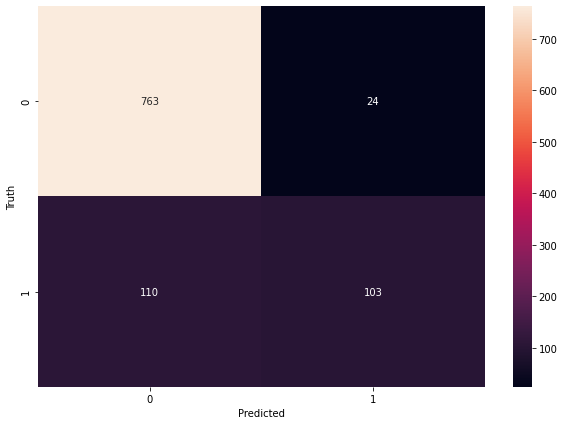

In [ ]:
Y_rf_pred = rf_clf.predict(X_test)
plot_confusion_matrix(y_test,Y_rf_pred)

*We have total of 1000 test data..

TN- 763 -- Actaully Not churned and predicted as also not churned

FP - 24  - Will not churn actually but predicted as will churn

FN - 110-- Will churn actually but predicted as will not churn

TP - 103-- Will churn and predicted as churn

So in our test data we have 213 instances where customers will churn but our current model is only able to predit 103 will churn and it labelled 110 as not churned which is not good**


**Next We can try by oversampling the minority datapoints and improve our results**

__OVERSAMPLING__

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# y = data['Exited']
# data.drop('Exited', axis=1, inplace=True)
X_balanced,y_balanced = oversample.fit_resample(data,y)

In [ ]:
print(X_balanced.shape)
print(y_balanced.shape)

# check for 1 and 0 in Y
y1 = [y2 for y2 in y_balanced if y2==1]
print(f" count of 1= {len(y1)}")
print(f"Count of 0= {len(y_balanced)-len(y1)}")

(15926, 11)
(15926,)
 count of 1= 7963
Count of 0= 7963


**Here we can see that  we have equal number of points for both our class 0 and 1.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bal,X_test_bal, Y_train_bal,Y_test_bal = train_test_split(X_balanced,y_balanced,stratify=y_balanced,test_size=0.2) # here we can increase the test size as our count has increased

**Linear Model(Logistic Regression)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_bal,Y_train_bal)
metrics = get_metrics(lr_clf,X_train_bal,X_test_bal, Y_train_bal,Y_test_bal)
print(metrics)

{'accuracy': 0.6622724419334589, 'precision': 0.6623748200448808, 'recall': 0.6622724419334589, 'f1_score': 0.6622191988251844}


**Random Forest**

In [ ]:
rf_clf_bal = get_classifier(X_train_bal,Y_train_bal,'random-forest',best_params)
print(rf_clf_bal)

metrics_bal = get_metrics(rf_clf_bal,X_train_bal,X_test_bal,Y_train_bal,Y_test_bal)
print(metrics_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'accuracy': 0.9111738857501569, 'precision': 0.9138039753799295, 'recall': 0.9111738857501569, 'f1_score': 0.9110325190264076}


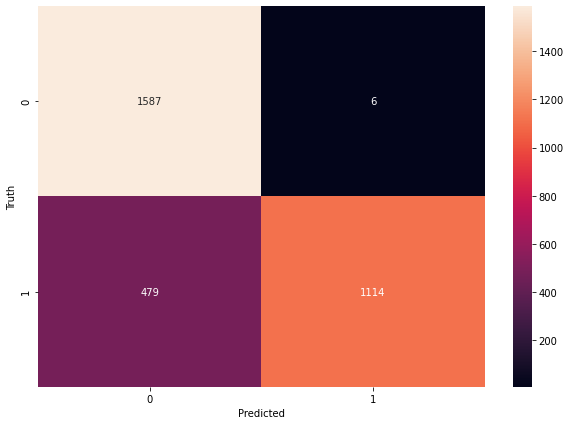

In [ ]:
Y_rf_pred_bal = rf_clf.predict(X_test_bal)
plot_confusion_matrix(Y_test_bal,Y_rf_pred_bal)

TN- 1587 -- Actaully Not churned and predicted as also not churned

FP - 6  - Will not churn actually but predicted as will churn

FN - 479-- Will churn actually but predicted as will not churn

TP - 1114 -- Will churn and predicted as churn

FP is reduced but FN is 479 which is not good, as for 479 instances , model has predicted that a customer will not churn while actually the customer will churn.

So, We can try another ensemble technique. Here i am using XGBOOST first without hyperparamter tuning and then with hyperparamter tuning.

**XGBOOST**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_bal,Y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
metrics_xgb = get_metrics(xgb_classifier,X_train_bal,X_test_bal,Y_train_bal,Y_test_bal)
print(metrics_xgb)

{'accuracy': 0.9023854362837413, 'precision': 0.9059368351084977, 'recall': 0.9023854362837413, 'f1_score': 0.9021714694184024}


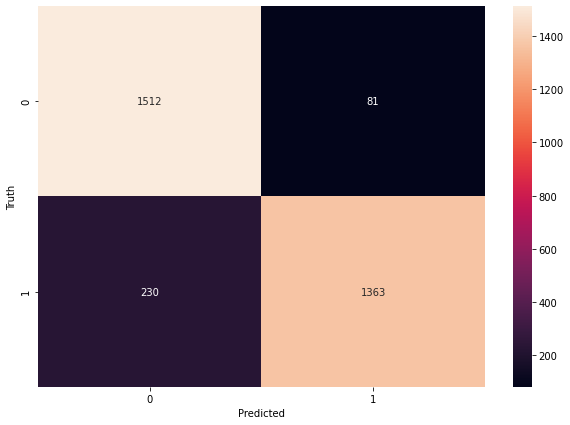

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test_bal)
plot_confusion_matrix(Y_test_bal,y_pred_xgb)

TN- 1512 -- Actaully Not churned and predicted as also not churned

FP - 81  - Will not churn actually but predicted as will churn

FN - 231 -- Will churn actually but predicted as will not churn

TP - 1363 -- Will churn and predicted as churn

**SO here our TN has reduced to 230 from 479 and out TP has also increased. We can further try with hyperparameter tuning**

**Hyperparameter Tuning For XGB**

In [ ]:
grid_cv = GridSearchCV(estimator=xgb_classifier,param_grid=param_grid,cv=3,verbose=1,n_jobs=3)
grid_cv.fit(X_train_bal, Y_train_bal)

In [ ]:
print(grid_cv.best_params_)

{'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 300}


In [ ]:
from xgboost import XGBClassifier
import pickle
xgb_classifier = XGBClassifier(bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=1, n_estimators=300)
xgb_classifier.fit(X_train_bal,Y_train_bal)
filename = 'finalized_model.pkl'
pickle.dump(xgb_classifier, open(filename, 'wb'))

In [ ]:
metrics_xgb = get_metrics(xgb_classifier,X_train_bal,X_test_bal,Y_train_bal,Y_test_bal)
print(metrics_xgb)

{'accuracy': 0.9143126177024482, 'precision': 0.9153340749495933, 'recall': 0.9143126177024482, 'f1_score': 0.914259901196281}


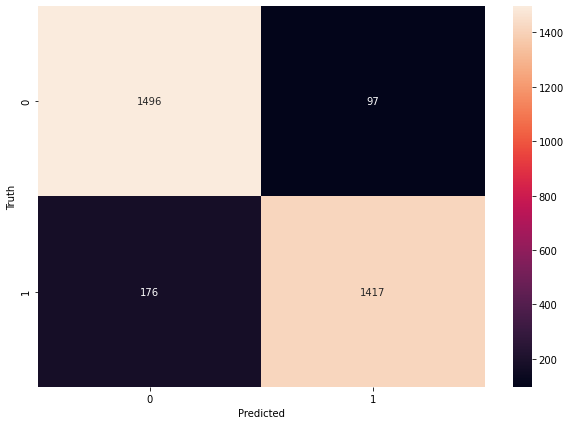

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test_bal)
plot_confusion_matrix(Y_test_bal,y_pred_xgb)

TN- 1496 -- Actaully Not churned and predicted as also not churned

FP - 97  - Will not churn actually but predicted as will churn

FN - 176 -- Will churn actually but predicted as will not churn

TP - 1417  -- Will churn and predicted as churn

**After doing hyperparamter tuning on xgboost we have improved further in reducing FN from 230 to 176 and increased TP from 1376 to 1417**

**Feature Importance**

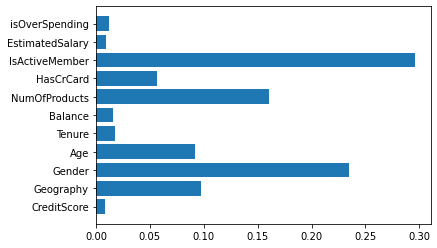

In [ ]:
plot_feature_importances(xgb_classifier, data)

We can see that for the best model we have the feature importances in decreasing order of importance are 
1. IsActiveMember
2. Gender
3. NumOfProducts
4. Geography
5. Age

**ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
# X_train_bal,X_test_bal, Y_train_bal,Y_test_bal
adaboost_clf.fit(X_train_bal,Y_train_bal)
metrics = get_metrics(adaboost_clf,X_train_bal,X_test_bal, Y_train_bal,Y_test_bal)
print(metrics)


{'accuracy': 0.8876333961079724, 'precision': 0.8886134868596491, 'recall': 0.8876333961079724, 'f1_score': 0.8875625037213397}


confusion Matrix for adaboost


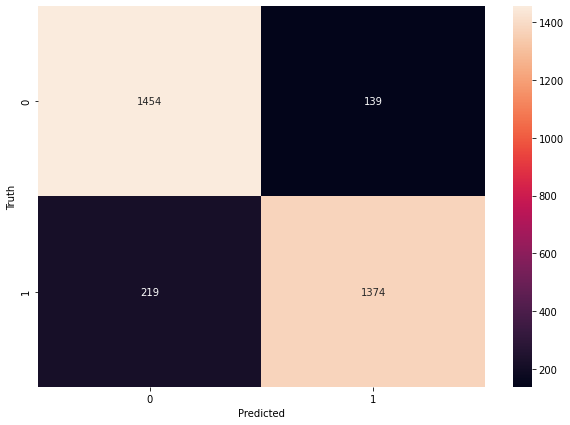

In [ ]:
print("confusion Matrix for adaboost")
y_pred_adaboost = adaboost_clf.predict(X_test_bal)
plot_confusion_matrix(Y_test_bal,y_pred_adaboost)


**CUSTOM ENSEMBLE MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

1) Split your whole data into train and test(80-20)

2) Now in the 80% train set, split the train set into D1 and D2.(50-50).
Now from this D1 do sampling with replacement to create d1,d2,d3....dk(k samples).
Now create 'k' models and train each of these models with each of these k samples.


3) Now pass the D2 set to each of these k models, now you will get k predictions for D2, from each of these models.



4) Now using these k predictions create a new dataset, and for D2, you already know its corresponding target values, 
so now you train a meta-model with these k predictions.





5) Now for model evaluation, you have can use the 20% data that you have kept as the test set.
 Pass that test set to each of the base models and you will get 'k' predictions. Now you create a new dataset 
 with these k predictions and pass it to your metamodel and you will get the final prediction. Now using this
  final prediction as well as the targets for the test set, you can calculate the models performance score.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def custom_ensemble(X_train,Y_train,X_test, n_estimators):
  datasets = []
  base_models=[]
  D1_X,D2_X,D1_Y,D2_Y = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.5)
  D1 = pd.concat([D1_X,D1_Y], axis=1)
  for i in range(0, n_estimators):
    sampled_data = sampling_with_replacement(D1,2000)
    datasets.append(sampled_data)
  

  ## Training base models on  random samples
  for data in datasets:
    y = data['Exited']
    data = data.drop('Exited', axis=1)
    clf = DecisionTreeClassifier()
    clf.fit(data,y)
    base_models.append(clf)

  # getting predictions for D2 from all base models
  predictions = []
  for model in base_models:
    predictions.append(model.predict(D2_X))

  # create a new Dataset from these predictions

  D_meta = pd.DataFrame()
  for prediction in predictions:
    D_meta = pd.concat([D_meta,pd.DataFrame(prediction)], axis=1)

  # giving column name to D_meta

  col_names = []
  for i in range(0,len(predictions)):
    name = f"col_{i}"
    col_names.append(name)

  D_meta.columns = col_names

  # Now training a meta_model on these predictions
  xgb = XGBClassifier()
  xgb.fit(D_meta,D2_Y)
  meta_model = xgb

  # model evaluation using X_test
  test_predictions = []
  D_meta_test = pd.DataFrame()
  for model in base_models:
    prediction = model.predict(X_test)
    test_predictions.append(prediction)

  D_meta_test = pd.DataFrame()
  for prediction in test_predictions:
    D_meta_test = pd.concat([D_meta_test,pd.DataFrame(prediction)], axis=1)

  col_names= []
  for i in range(0,len(test_predictions)):
    name = f"col_{i}"
    col_names.append(name)
  
  D_meta_test.columns = col_names

  final_prediction = meta_model.predict(D_meta_test)
  return final_prediction

In [ ]:
file_path = '/content/Churn Modeling.csv'
n_estimators = [100,200,300,400,450,500]
acc_arr = []
data = pd.read_csv(file_path)
y = data['Exited']
data = data.drop('Exited', axis=1)
data.drop('Surname', axis=1, inplace=True)
data.drop('CustomerId', axis=1,inplace=True)
data.drop('RowNumber', axis=1, inplace=True)

## handling categorical columns
data['Gender'].replace({'Female':1, 'Male':0}, inplace=True) 
data['Geography'].replace({'France':0, 'Germany':1, 'Spain':2}, inplace=True)
data['isOverSpending'] = data['Balance']>data['EstimatedSalary']
data['isOverSpending'].replace({False:0,True:1}, inplace=True)
# train-test(80-20)
X_train, X_test, Y_train, Y_test = train_test_split(data, y , stratify=y, test_size=0.2)
acc_arr = []
for n_estimator in n_estimators:
  pred = custom_ensemble(X_train, Y_train, X_test, n_estimator)
  acc = accuracy_score(Y_test, pred)
  acc_arr.append(acc)

print(acc_arr)


[0.8505, 0.8515, 0.8525, 0.8545, 0.8535, 0.862]


**For n_estimator 500 i got max accuracy 0.862**

In [ ]:
def sampling_with_replacement(data,num_of_rows):
  sampled_data = data.sample(n=num_of_rows , replace=True)
  return sampled_data

**Summary Of All Models**

In [ ]:
from prettytable import PrettyTable 
conclusion = PrettyTable(["DataSet(Balanced/Imbalanced)", "Classifier", "Accuracy", "Precision", "Recall", "F1 score"])
conclusion.add_row(["ImBalanced","XGB Classifier", 0.902385, 0.905936,0.90238543,0.9021714])
conclusion.add_row(["Balanced","XGB Classifier", 0.9143126,0.9153340,0.9143126, 0.914259901])
conclusion.add_row(["ImBalanced","RandomForest", 0.866, 0.860584,0.866, 0.8525240255138199])
conclusion.add_row(["ImBalanced","Custom Ensemble ", "0.862\n (Number of base learners=500{ this should be random})","NA","NA","NA"])
conclusion.add_row(["Balanced","RandomForest",  0.911173885, 0.913803975, 0.9111738857, 0.9110325190])
conclusion.add_row(["Balanced","ADABOOST",  0.8876333961079724,  0.8886134868596491,  0.8876333961079724,  0.8875625037213397])
conclusion.add_row(["Balanced","LogisticRegression",   0.6622724419334589,0.6623748200448808,0.6622724419334589,0.6622191988251844])

print(conclusion)

+------------------------------+--------------------+--------------------------------------------------------+--------------------+--------------------+--------------------+
| DataSet(Balanced/Imbalanced) |     Classifier     |                        Accuracy                        |     Precision      |       Recall       |      F1 score      |
+------------------------------+--------------------+--------------------------------------------------------+--------------------+--------------------+--------------------+
|          ImBalanced          |   XGB Classifier   |                        0.902385                        |      0.905936      |     0.90238543     |     0.9021714      |
|           Balanced           |   XGB Classifier   |                       0.9143126                        |      0.915334      |     0.9143126      |    0.914259901     |
|          ImBalanced          |    RandomForest    |                         0.866                          |      0.860584      

**Final Methods (Final Submission)**

In [ ]:
# creating a Custom Exception so that whenever a wrong dataframe is passed it will give an exception
class ColumnNotKnownError(Exception):
  def __init__(self, message):
    self.message = message
    print(self.message)

In [ ]:
def final_prediction(data):   
   '''
       This method is to get the  prediction of a single datapoint
       This will take a dataframe of the actual raw data(without target variables) with only one row

       If the dataframe provided contains any new column  which is not present in the data on which my model is trained
      then it will raise a custom Exception giving a message that particular column is not present while training

      Then It will preprocess the data as done while training and then use the model to predict and will return the prediction

      Input: - 
             1) A Dataframe with only one records.
             

      output: - 
             1) Predicted value of the given datapoint.
   '''




  # checking if we get correct dataframe with all the columns that our model is trained on
  original_cols = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
  current_cols = data.columns.values

  for col in current_cols:
    if col not in  original_cols:
      raise ColumnNotKnownError(f"{col} not found in data on which model was trained.. Please change your data")


   
  # preprocess data like as we did on train data
  # removing unwanted columns
  data.drop('Surname', axis=1,inplace=True) 
  data.drop('CustomerId', axis=1,inplace=True)
  data.drop('RowNumber', axis=1, inplace=True)

  # adding one more feature Isoverspending as done while training

  data['isOverSpending'] = data['Balance']>data['EstimatedSalary']

  # converting  categorical columns to Numeric using label encoding

  data['Gender'].replace({'Female':1, 'Male':0}, inplace=True) 
  data['Geography'].replace({'France':0, 'Germany':1, 'Spain':2}, inplace=True)
  data['isOverSpending'].replace({False:0,True:1}, inplace=True)

  predict = rf_clf.predict(data)
  return predict

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def final_metrics(data,Y):
   
   '''
       This method is to get the metrics of prediction of the model and actual truth value.
       This will take a dataframe of the actual raw data(without target variables) and their corresponding truth value.

       If the dataframe provided contains any new column  which is not present in the data on which my model is trained
      then it will raise a custom Exception giving a message that particular column is not present while training

      Then It will preprocess the data as done while training and then use the model to predict and from the predicted value will 
      calculate all the metrics.

      Input: - 
             1) A Dataframe
             2) Y [Acutal Truth Values]

      output: - 
             1) A dictionary which have key as the metric name example accuracy, precision  and value as the metric value on the given data
   
   '''


  
  original_cols = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
  current_cols = data.columns.values
 
  # checking if the given dataframe contains any columns that are not in the data on which my model is trained.
  for col in current_cols:
    if col not in  original_cols:
      raise ColumnNotKnownError(f"{col} not found in data on which model was trained.. Please change your data")


   
  # preprocess data like as we did on train data
  # removing unwanted columns
  data.drop('Surname', axis=1,inplace=True) 
  data.drop('CustomerId', axis=1,inplace=True)
  data.drop('RowNumber', axis=1, inplace=True)

  # adding one more feature Isoverspending as done while training

  data['isOverSpending'] = data['Balance']>data['EstimatedSalary']

  # converting  categorical columns to Numeric using label encoding

  data['Gender'].replace({'Female':1, 'Male':0}, inplace=True) 
  data['Geography'].replace({'France':0, 'Germany':1, 'Spain':2}, inplace=True)
  data['isOverSpending'].replace({False:0,True:1}, inplace=True)

  predict = rf_clf.predict(data)
  metrics = dict()
  accuracy = accuracy_score(Y,predict)
  precision= precision_score(Y,predict, average='weighted')
  recall = recall_score(Y,predict,average='weighted')
  f1_scores = f1_score(Y,predict,average='weighted')
  
  # creating metrics dict
  metrics = dict()
  metrics['accuracy'] = accuracy
  # metrics['auc_test'] = auc_test
  # metrics['auc_train'] = auc_train
  metrics['precision'] = precision
  metrics['recall'] = recall
  metrics['f1_score'] = f1_scores

  return metrics



**Testing method final_prediction**

In [ ]:
# creating dataframe for 1 record

columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
# columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

values =[1,15634602,'Hargrave',619,'France','Female',42,2,0,1,1,1,101348.88]

test_record = dict()
for index,col in enumerate(columns):
  test_record[col] = [values[index]]

test_df = pd.DataFrame.from_dict(test_record,orient='columns')

prediction = final_prediction(test_df)
print(prediction)
if prediction == 1:
  print("This customer Will Churn")
else:
  print("This customer Will Not Churn")


[1]
This customer Will Churn


In [ ]:
# creating dataframe for 1 record
# testing by passing an unknown column so that it will fail giving an error message
columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','unknown_col','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
# columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

values =[1,15634602,'Hargrave',619,'France',3,'Female',42,2,0,1,1,1,101348.88]

test_record = dict()
for index,col in enumerate(columns):
  test_record[col] = [values[index]]

test_df = pd.DataFrame.from_dict(test_record,orient='columns')

prediction = final_prediction(test_df)
print(prediction)


unknown_col not found in data on which model was trained.. Please change your data


ColumnNotKnownError: ignored

**This Error is done intentionally to show what will happen if wrong dataframe is given.**

**Testing method  final_metrics**

In [ ]:
# creating dataframe of 10 records to pass to final_metrics method

# i have created  a small test file which contains ten records only
test_data = pd.read_csv('/content/small_churn_file.csv')
test_data.shape

(10, 14)

In [ ]:
test_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,456,France,Female,34,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,897,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,1123,France,Female,22,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,9098,France,Female,31,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,123,Spain,Female,23,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,11,Spain,Male,14,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,789,France,Male,10,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,3465,Germany,Female,59,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
y = test_data['Exited']
test_data.drop('Exited', axis=1, inplace=True)

metrics = final_metrics(test_data,y)
print(metrics)

(10, 14)
{'accuracy': 0.8, 'precision': 0.8, 'recall': 0.8, 'f1_score': 0.8}
